# Predicting Heart Diseases

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data
Read the train_framingham.csv file into a pandas dataframe

In [2]:
train = pd.read_csv("framingham.csv")

In [3]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,37,2.0,1,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
1,0,61,1.0,0,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
2,1,44,2.0,1,15.0,0.0,0,0,0,209.0,127.0,86.0,26.41,85.0,88.0,0
3,1,47,3.0,1,15.0,0.0,0,1,0,220.0,127.0,93.0,30.70,82.0,57.0,0
4,0,41,3.0,1,3.0,0.0,0,0,0,140.0,110.0,60.0,23.38,65.0,82.0,0


### Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

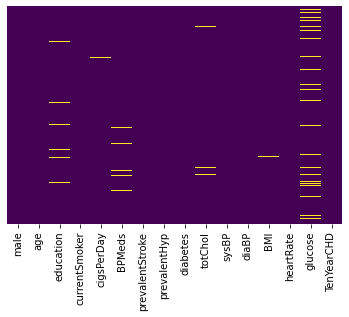

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Drop Missing Data

In [5]:
train.dropna(inplace=True)

#### Data Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP',
                'BMI', 'heartRate', 'glucose']

In [8]:
train[numeric_features] = StandardScaler().fit_transform(train[numeric_features])

In [9]:
train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2,1,-0.852262,2.0,1,0.431861,0.0,0,0,0,-0.686549,-0.415531,0.079783,0.039784,0.737159,0.099742,0
3,1,-0.502640,3.0,1,0.431861,0.0,0,1,0,-0.453261,-0.415531,0.606828,1.008981,0.491341,-0.829773,0
4,0,-1.201883,3.0,1,-0.547512,0.0,0,0,0,-2.149901,-1.095556,-1.877814,-0.644754,-0.901625,-0.080164,0
5,0,-0.153018,2.0,1,0.839934,0.0,0,0,0,0.352642,-0.575537,-1.124892,-1.471621,0.327463,-0.409992,0
6,1,0.196603,1.0,1,0.431861,0.0,0,1,0,0.395058,0.184491,0.230367,-0.583755,1.638491,-0.230086,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1,-0.153018,1.0,0,-0.792356,0.0,0,0,0,0.395058,-0.735543,-0.823723,-0.990411,0.327463,-0.380008,1
1284,1,0.546225,4.0,0,-0.792356,1.0,0,1,0,0.967674,0.464501,0.983289,-1.028818,1.146855,-0.290055,1
1285,1,0.779306,1.0,0,-0.792356,0.0,0,0,0,-0.177558,-0.475533,-0.070802,-0.041547,-0.737747,-0.260070,1
1286,1,1.944712,1.0,0,-0.792356,0.0,0,1,0,-1.386413,1.224530,0.907997,-0.698974,-1.311322,-0.170117,1


#### Data Visualization

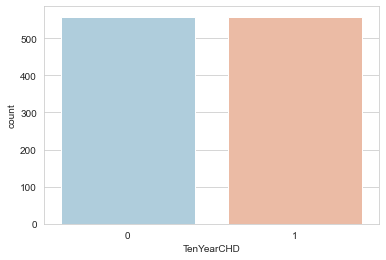

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=train,palette='RdBu_r')

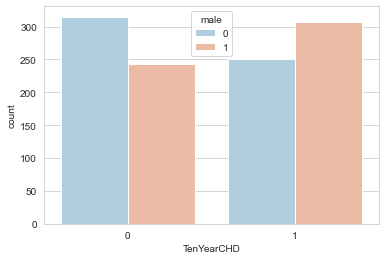

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',hue='male',data=train,palette='RdBu_r')

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('TenYearCHD',axis=1), 
                                                    train['TenYearCHD'], test_size=0.2, 
                                                    random_state=42)

### Training and Predicting

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression(solver = "liblinear",)
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
predictions = logmodel.predict(X_test)

### Evaluation
We can check precision,recall,f1-score using classification report!

In [17]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       117
           1       0.67      0.70      0.68       106

    accuracy                           0.69       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.69      0.69      0.69       223

